In [205]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
df = pd.read_csv("data/cleaned_data.csv")
df.head(10)

,DEPSTN,ARRSTN,AC_TYPE,target,flight_duration,month,dayparts,hour_bucket
0,CMN,TUN,32A,260.0,145.0,Jan,Morning,h10
1,MXP,TUN,31B,20.0,110.0,Jan,Afternoon,h15
2,TUN,IST,32A,0.0,155.0,Jan,Night,h04
3,DJE,NTE,736,0.0,170.0,Jan,Afternoon,h14
4,TUN,ALG,320,22.0,80.0,Jan,Afternoon,h14
5,TLS,TUN,736,53.0,115.0,Jan,Afternoon,h16
6,TUN,BCN,32A,10.0,105.0,Jan,Early Morning,h07
7,TUN,ORY,32A,15.0,140.0,Jan,Early Morning,h07
8,TUN,FCO,32A,16.0,80.0,Jan,Early Morning,h07
9,TUN,NCE,31A,21.0,90.0,Jan,Early Morning,h07


In [207]:
# Group the data by month and calculate the mean delay
mean_delay_per_month = df.groupby('month')['target'].mean().sort_values(ascending=False)

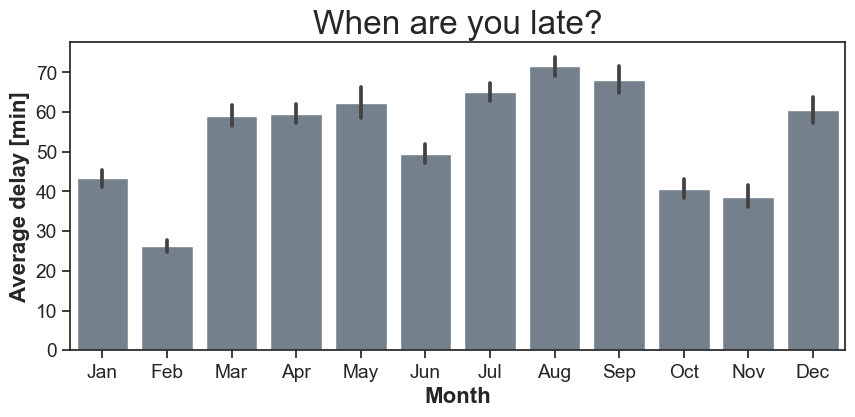

In [ ]:
# Used data directly from orginal df to get ci-markers. Calculated values above were no good for that.

# Set plot size and style
plt.figure(figsize=(10, 4))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x="month", y="target", errorbar=('ci', 95), color="slategrey") #, order=mean_delay_per_month.index)
g.figure.set_size_inches(10, 4)


# Set titles and labels
plt.title('When are you late?', fontsize=24)
plt.xlabel('Month', fontsize=16, fontweight='bold')
plt.ylabel('Average delay [min]', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
# Group the data by month and count the flights
flights_per_month = df.groupby('month')['target'].count() #.sort_values(ascending=False)

# Some shenanigans to be able to order the bars the right way from Jan to Dec
flights_per_month = flights_per_month.to_frame()
flights_per_month = flights_per_month.reset_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
flights_per_month['month'] = pd.Categorical(flights_per_month['month'], categories=months, ordered=True)
flights_per_month

,month,target
0,Apr,8365
1,Aug,11746
2,Dec,7588
3,Feb,4295
4,Jan,7231
5,Jul,10840
6,Jun,8585
7,Mar,7584
8,May,5942
9,Nov,6721


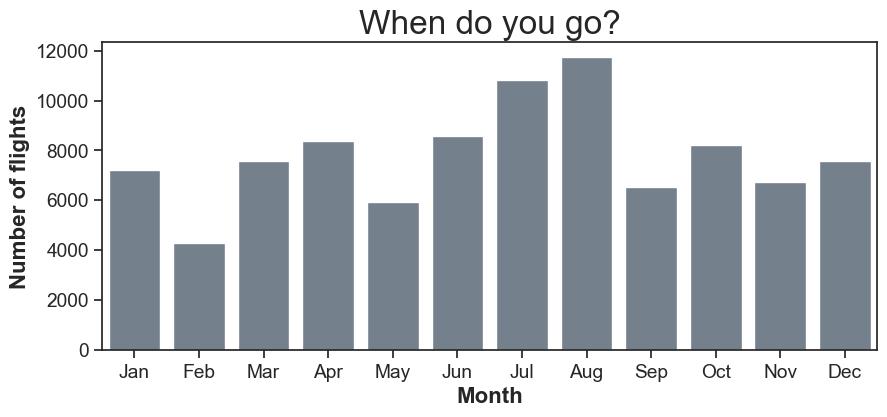

In [210]:
# Set plot size and style
plt.figure(figsize=(10, 4))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=flights_per_month, x="month", y="target", color="slategrey") #, order=mean_delay_per_month.index) #that's not a typo. it's the same order as in the plot above
g.figure.set_size_inches(10, 4)


# Set titles and labels
plt.title('When do you go?', fontsize=24)
plt.xlabel('Month', fontsize=16, fontweight='bold')
plt.ylabel('Number of flights', fontsize=16, fontweight='bold')

plt.show()

In [211]:
# Group the data by part of day and calculate the mean delay
mean_delay_per_daypart = df.groupby('dayparts')['target'].mean().sort_values(ascending=False)

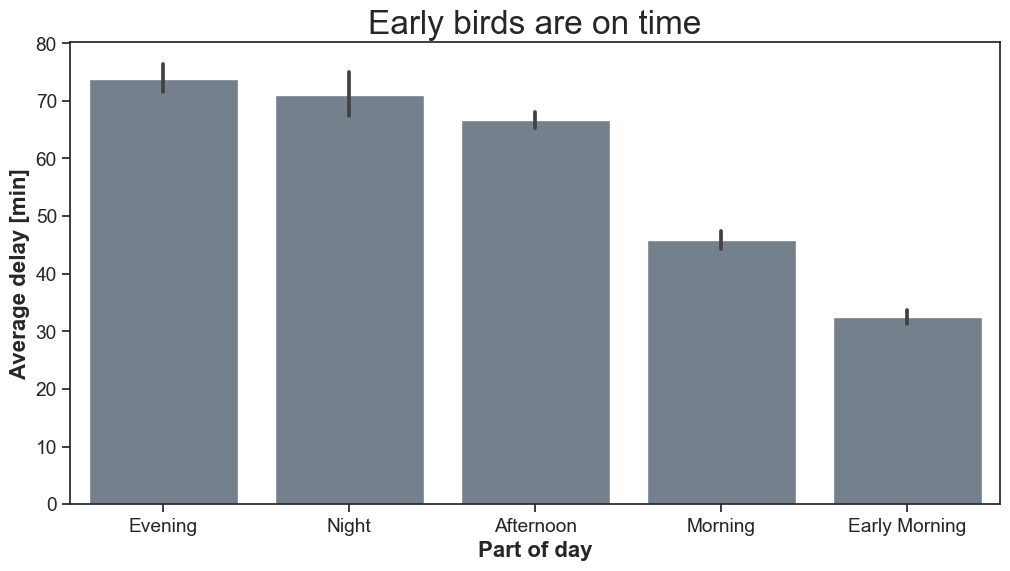

In [ ]:
# Used data directly from orginal df to get ci-markers. Calculated values above were no good for that.

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x="dayparts", y="target", errorbar=('ci', 95), color="slategrey", order=mean_delay_per_daypart.index)
g.figure.set_size_inches(12, 6)


# Set titles and labels
plt.title('Early birds are on time', fontsize=24)
plt.xlabel('Part of day', fontsize=16, fontweight='bold')
plt.ylabel('Average delay [min]', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
# Group the data by hour and calculate the mean delay
# Labelling the data without the "h" was not simple for me ;) 

mean_delay_per_hour = df.groupby('hour_bucket')['target'].mean() #.sort_values(ascending=False)
hour_lab = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
mean_delay_per_hour

hour_bucket
h00    88.844032
h01    82.967641
h02    66.572127
h03    26.374165
h04    37.088971
h05    31.016888
h06    26.634634
h07    31.442383
h08    39.479430
h09    45.623165
h10    43.829377
h11    49.113855
h12    56.750325
h13    59.094295
h14    66.807960
h15    65.001732
h16    80.500000
h17    72.533866
h18    69.622576
h19    89.251611
h20    62.655643
h21    62.316230
h22    82.468141
h23    70.835227
Name: target, dtype: float64

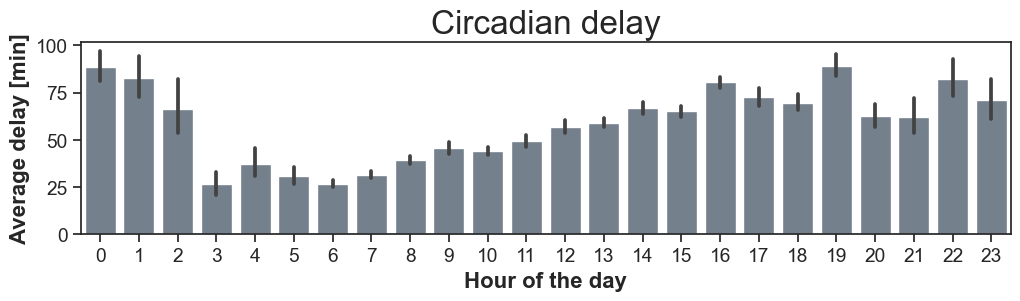

In [ ]:
# Used data directly from orginal df to get ci-markers. Calculated values above were no good for that. It's a mix of both.

# Set plot size and style
plt.figure(figsize=(12, 2.5))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x="hour_bucket", y="target", errorbar=('ci', 95), color="slategrey", order=mean_delay_per_hour.index)
g.figure.set_size_inches(12, 2.5)
g.set_xticklabels(hour_lab)

# Set titles and labels
plt.title('Circadian delay', fontsize=24)
plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
plt.ylabel('Average delay [min]', fontsize=16, fontweight='bold')
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()

In [215]:
# Group the data by hour and calculate count of flights
flights_per_hour = df.groupby('hour_bucket')['target'].count() #.sort_values(ascending=False)

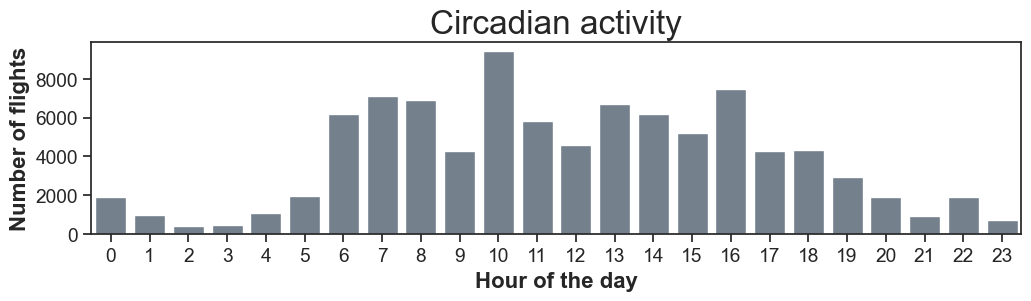

In [ ]:
# Used data directly from orginal df. It's a mix of both.

# Set plot size and style
plt.figure(figsize=(12, 2.5))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x=flights_per_hour.index, y=flights_per_hour.values, color="slategrey")
g.figure.set_size_inches(12, 2.5)
g.set_xticklabels(hour_lab)

# Set titles and labels
plt.title('Circadian activity', fontsize=24)
plt.xlabel('Hour of the day', fontsize=16, fontweight='bold')
plt.ylabel('Number of flights', fontsize=16, fontweight='bold')

plt.show()

In [217]:
# Group the airport where flights depart and calculate count of flights
most_departures = df.groupby('DEPSTN')['target'].count().sort_values(ascending=False)
most_departures[:10]

DEPSTN
TUN    34283
DJE     7033
ORY     6726
MIR     4879
MRS     2834
LYS     2334
NCE     2221
ALG     1570
MXP     1531
IST     1437
Name: target, dtype: int64

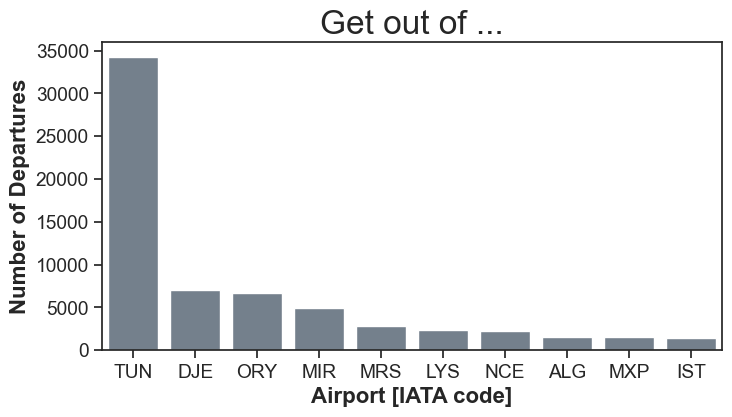

In [ ]:
# Used data directly from orginal df. It's a mix of both.

# Set plot size and style
plt.figure(figsize=(8, 4))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x=most_departures.index[:10], y=most_departures.values[:10], color="slategrey")
g.figure.set_size_inches(8, 4)


# Set titles and labels
plt.title('Get out of ...', fontsize=24)
plt.xlabel('Airport [IATA code]', fontsize=16, fontweight='bold')
plt.ylabel('Number of Departures', fontsize=16, fontweight='bold')

plt.show()

In [219]:
# Group the airport where flights depart and calculate count of flights
most_arrivals = df.groupby('ARRSTN')['target'].count().sort_values(ascending=False)
most_arrivals[:10]

ARRSTN
TUN    34310
DJE     7058
ORY     6726
MIR     4878
MRS     2834
LYS     2336
NCE     2222
ALG     1570
MXP     1531
IST     1437
Name: target, dtype: int64

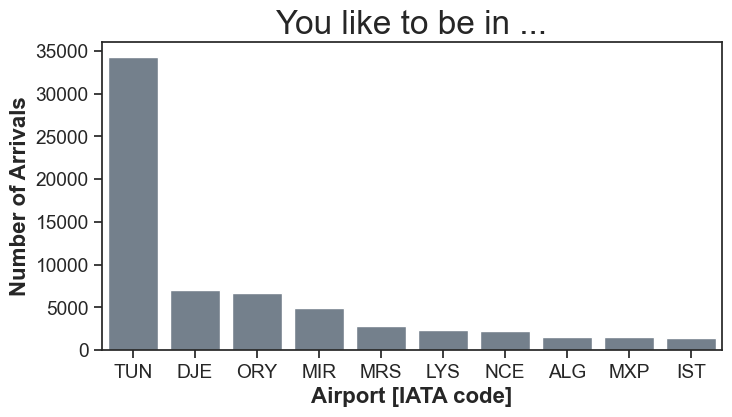

In [ ]:
# Used data directly from orginal df. It's a mix of both.

# Set plot size and style
plt.figure(figsize=(8, 4))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x=most_arrivals.index[:10], y=most_arrivals.values[:10], color="slategrey")
g.figure.set_size_inches(8, 4)


# Set titles and labels
plt.title('You like to be in ...', fontsize=24)
plt.xlabel('Airport [IATA code]', fontsize=16, fontweight='bold')
plt.ylabel('Number of Arrivals', fontsize=16, fontweight='bold')

plt.show()

In [221]:
# Group the data by part of day and calculate the mean delay
mean_delay_per_departure_airport = df.groupby('DEPSTN')['target'].mean().sort_values(ascending=False)
mean_delay_per_departure_airport[:10]

DEPSTN
RTM    505.571429
KBP    341.000000
VOG    328.000000
BDS    202.000000
ARN    161.000000
AYT    159.500000
AAE    157.000000
HAJ    153.047619
IEV    152.250000
VKO    138.883333
Name: target, dtype: float64

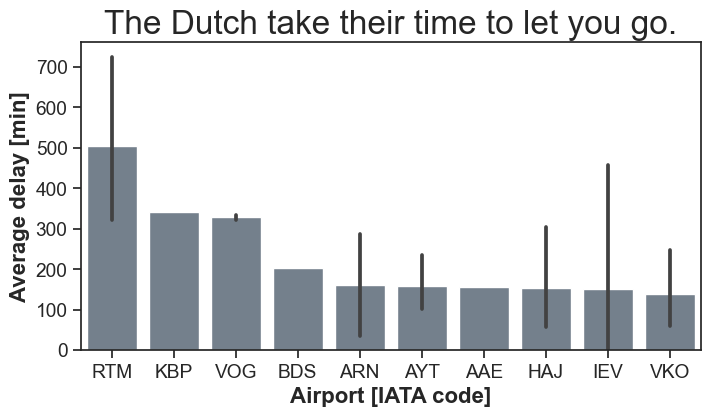

In [ ]:
# Used data directly from orginal df to get ci-markers. Calculated values above were no good for that.

# Set plot size and style
plt.figure(figsize=(8, 4))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x="DEPSTN", y="target", errorbar=('ci', 95), color="slategrey", order=df.groupby('DEPSTN')['target'].mean().sort_values(ascending=False).iloc[:10].index)
g.figure.set_size_inches(8, 4)


# Set titles and labels
plt.title('The Dutch take their time to let you go.', fontsize=24)
plt.xlabel('Airport [IATA code]', fontsize=16, fontweight='bold')
plt.ylabel('Average delay [min]', fontsize=16, fontweight='bold')

plt.show()

In [223]:
# Group the data by part of day and calculate the mean delay
mean_delay_per_arrival_airport = df.groupby('ARRSTN')['target'].mean().sort_values(ascending=False)
mean_delay_per_arrival_airport[:10]

ARRSTN
RTM    389.285714
TMR    382.000000
ESB    355.000000
VOG    178.000000
ARN    177.000000
RAK    140.000000
AYT    137.666667
GHA    130.000000
GAF    120.000000
LIL    112.800000
Name: target, dtype: float64

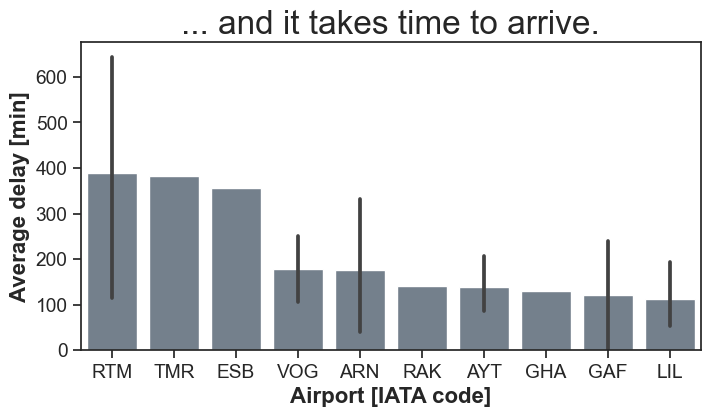

In [ ]:
# Used data directly from orginal df to get ci-markers. Calculated values above were no good for that.

# Set plot size and style
plt.figure(figsize=(8, 4))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=df, x="ARRSTN", y="target", errorbar=('ci', 95), color="slategrey", order=df.groupby('ARRSTN')['target'].mean().sort_values(ascending=False).iloc[:10].index)
g.figure.set_size_inches(8, 4)


# Set titles and labels
plt.title("... and it takes time to arrive.", fontsize=24)
plt.xlabel('Airport [IATA code]', fontsize=16, fontweight='bold')
plt.ylabel('Average delay [min]', fontsize=16, fontweight='bold')

plt.show()

In [225]:
print(df.target.describe())
print("Median: ", df.target.median())

count    93679.000000
mean        55.655099
std        123.262956
min          0.000000
25%          0.000000
50%         19.000000
75%         50.000000
max       3451.000000
Name: target, dtype: float64
Median:  19.0


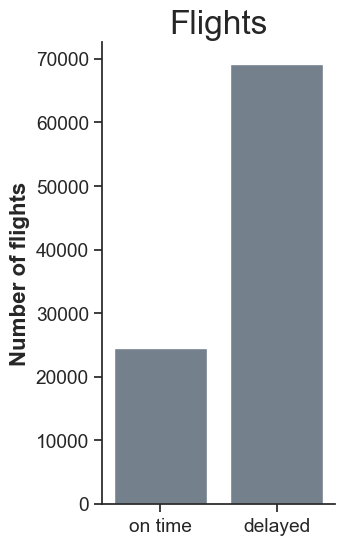

In [ ]:
# Calculate data for the plot.
ontime = df.target.value_counts().get(0, 0)
delayed = len(df.target) - ontime
d_plot = pd.DataFrame({'on time': [ontime], 'delayed': [delayed]})

# Set plot size and style
plt.figure(figsize=(3, 6))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=d_plot, color="slategrey")
g.figure.set_size_inches(3, 6)

# Set titles and labels
plt.title("Flights", fontsize=24)
plt.xlabel('', fontsize=16, fontweight='bold')
plt.ylabel('Number of flights', fontsize=16, fontweight='bold')
sns.despine(top=True, right=True)
plt.show()

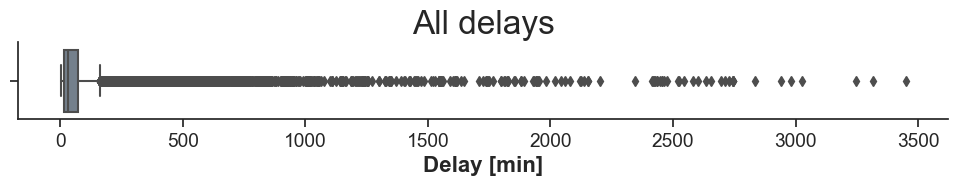

In [227]:
delayed_fl = df[df["target"] != 0][["target"]]

# Set plot size and style
plt.figure(figsize=(12, 1))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.boxplot(data=delayed_fl, x="target", color="slategrey")
g.figure.set_size_inches(12, 1)

# Set titles and labels
plt.title("All delays", fontsize=24)
plt.xlabel('Delay [min]', fontsize=16, fontweight='bold')
sns.despine(top=True, right=True)
plt.show()

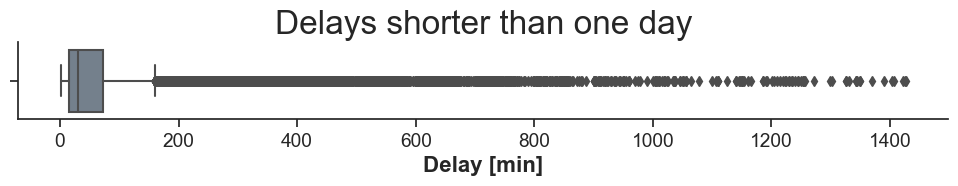

In [228]:
delayed_fl = df[df["target"] != 0][["target"]]
delayed_fl = delayed_fl[delayed_fl['target'] <= 1440]

# Set plot size and style
plt.figure(figsize=(12, 1))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.boxplot(data=delayed_fl, x="target", color="slategrey")
g.figure.set_size_inches(12, 1)

# Set titles and labels
plt.title("Delays shorter than one day", fontsize=24)
plt.xlabel('Delay [min]', fontsize=16, fontweight='bold')
sns.despine(top=True, right=True)
plt.show()

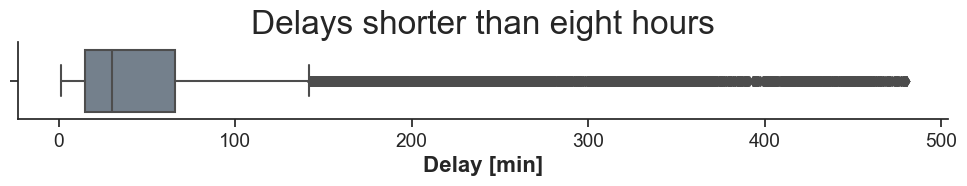

In [229]:
delayed_fl = df[df["target"] != 0][["target"]]
delayed_fl = delayed_fl[delayed_fl['target'] <= 480]

# Set plot size and style
plt.figure(figsize=(12, 1))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.boxplot(data=delayed_fl, x="target", color="slategrey")
g.figure.set_size_inches(12, 1)

# Set titles and labels
plt.title("Delays shorter than eight hours", fontsize=24)
plt.xlabel('Delay [min]', fontsize=16, fontweight='bold')
sns.despine(top=True, right=True)
plt.show()

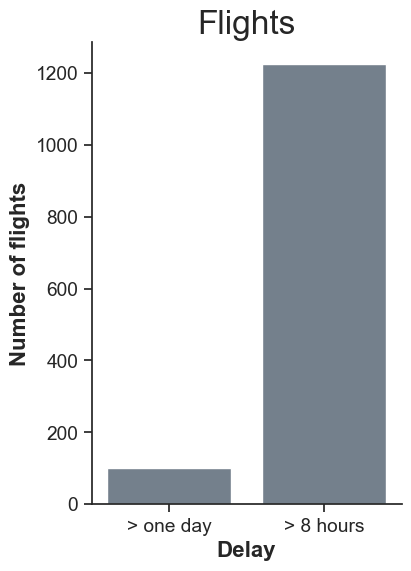

In [ ]:
# Calculate data for plot, but the figure was not used in presentation

count_1440 = sum(1 for x in df.target if x > 1440)
count_480 = sum(1 for x in df.target if x > 480)

d_plot_2 = pd.DataFrame({'> one day': [count_1440], '> 8 hours': [count_480]})

# Set plot size and style
plt.figure(figsize=(4, 6))
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.barplot(data=d_plot_2, color="slategrey")
g.figure.set_size_inches(4, 6)

# Set titles and labels
plt.title("Flights", fontsize=24)
plt.xlabel('Delay', fontsize=16, fontweight='bold')
plt.ylabel('Number of flights', fontsize=16, fontweight='bold')
sns.despine(top=True, right=True)
plt.show()